In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import numpy as np

In [3]:
df = pd.read_csv("Thyroidp.csv")

# Exploratory Data Analysis

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      429 non-null    int64  
 1   Sex                      429 non-null    int64  
 2   On_thyroxine             429 non-null    int64  
 3   Query_on_thyroxine       429 non-null    int64  
 4   On_antithyroid_medicine  429 non-null    int64  
 5   Sick                     429 non-null    int64  
 6   Pregnant                 429 non-null    int64  
 7   Thyroid_surgery          429 non-null    int64  
 8   I131_treatment           429 non-null    int64  
 9   Query_hypothyroid        429 non-null    int64  
 10  Query_hyperthyroid       429 non-null    int64  
 11  Lithium                  429 non-null    int64  
 12  Goitre                   429 non-null    int64  
 13  Tumor                    429 non-null    int64  
 14  Hypopituitary            4

In [53]:
df.describe()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Pysch,TSH,T3,TT4,T4U,FTI,Class
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.0,429.000000,429.000000,429.0,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,49.226107,0.282051,0.114219,0.016317,0.013986,0.060606,0.016317,0.016317,0.025641,0.062937,0.041958,0.0,0.002331,0.025641,0.0,0.025641,0.006959,0.019724,0.102483,0.096977,0.107428,2.750583
std,21.079349,0.450524,0.318449,0.126840,0.117570,0.238885,0.126840,0.126840,0.158246,0.243133,0.200727,0.0,0.048280,0.158246,0.0,0.158246,0.020461,0.007346,0.038415,0.018163,0.045542,0.564346
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000050,0.002000,0.002900,0.019000,0.002800,1.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000300,0.017000,0.081000,0.088000,0.087000,3.000000
50%,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.001300,0.020600,0.101000,0.098000,0.107000,3.000000
75%,65.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.002600,0.023000,0.120000,0.103000,0.121000,3.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.183000,0.062000,0.301000,0.182000,0.612000,3.000000


In [54]:
df.head()

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Lithium,Goitre,Tumor,Hypopituitary,Pysch,TSH,T3,TT4,T4U,FTI,Class
0,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.061,0.0096,0.0130,0.116,0.0110,1
1,78,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.025,0.0090,0.0500,0.084,0.0600,1
2,73,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.047,0.0110,0.0520,0.090,0.0580,1
3,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.070,0.0050,0.0029,0.104,0.0028,1
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.031,0.0080,0.0130,0.119,0.0110,1


In [55]:
df.isnull().sum() # checking for null values in dataset

Age                        0
Sex                        0
On_thyroxine               0
Query_on_thyroxine         0
On_antithyroid_medicine    0
Sick                       0
Pregnant                   0
Thyroid_surgery            0
I131_treatment             0
Query_hypothyroid          0
Query_hyperthyroid         0
Lithium                    0
Goitre                     0
Tumor                      0
Hypopituitary              0
Pysch                      0
TSH                        0
T3                         0
TT4                        0
T4U                        0
FTI                        0
Class                      0
dtype: int64

In [4]:
column = ['Lithium','Goitre','Hypopituitary']

In [5]:
df.drop(columns=column,axis=1,inplace=True)

<AxesSubplot: >

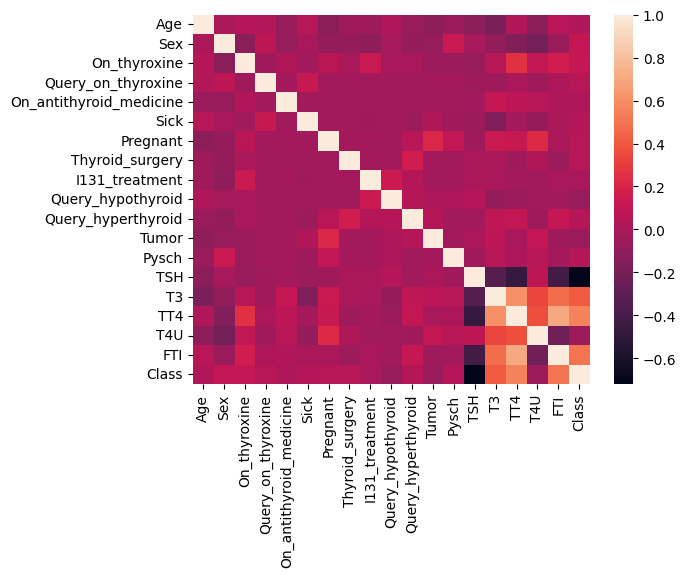

In [58]:
sns.heatmap(df.corr())

In [59]:
df.head(10)

,Age,Sex,On_thyroxine,Query_on_thyroxine,On_antithyroid_medicine,Sick,Pregnant,Thyroid_surgery,I131_treatment,Query_hypothyroid,Query_hyperthyroid,Tumor,Pysch,TSH,T3,TT4,T4U,FTI,Class
0,5,0,1,0,0,0,0,0,1,0,0,0,0,0.06100,0.0096,0.0130,0.116,0.0110,1
1,78,0,0,0,0,0,0,0,0,1,0,0,0,0.02500,0.0090,0.0500,0.084,0.0600,1
2,73,0,0,0,0,0,0,0,0,0,0,0,0,0.04700,0.0110,0.0520,0.090,0.0580,1
3,43,0,0,0,0,0,0,0,0,0,0,0,0,0.07000,0.0050,0.0029,0.104,0.0028,1
4,42,0,0,0,0,0,0,0,0,0,0,0,0,0.03100,0.0080,0.0130,0.119,0.0110,1
5,53,0,0,0,0,0,0,0,0,0,0,0,0,0.02500,0.0040,0.0390,0.061,0.0640,1
6,51,0,0,0,0,0,0,0,0,0,0,0,0,0.02400,0.0040,0.0030,0.099,0.0030,1
7,4,0,0,0,0,0,0,0,0,0,0,0,0,0.04200,0.0020,0.0048,0.090,0.0054,1
8,6,0,0,0,0,0,0,0,0,0,0,0,0,0.00809,0.0180,0.0590,0.096,0.0610,1
9,69,0,0,0,0,0,0,0,0,0,0,0,0,0.02000,0.0100,0.0510,0.084,0.0610,1


In [60]:
df['Class'].value_counts()

3    350
2     51
1     28
Name: Class, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='count'>

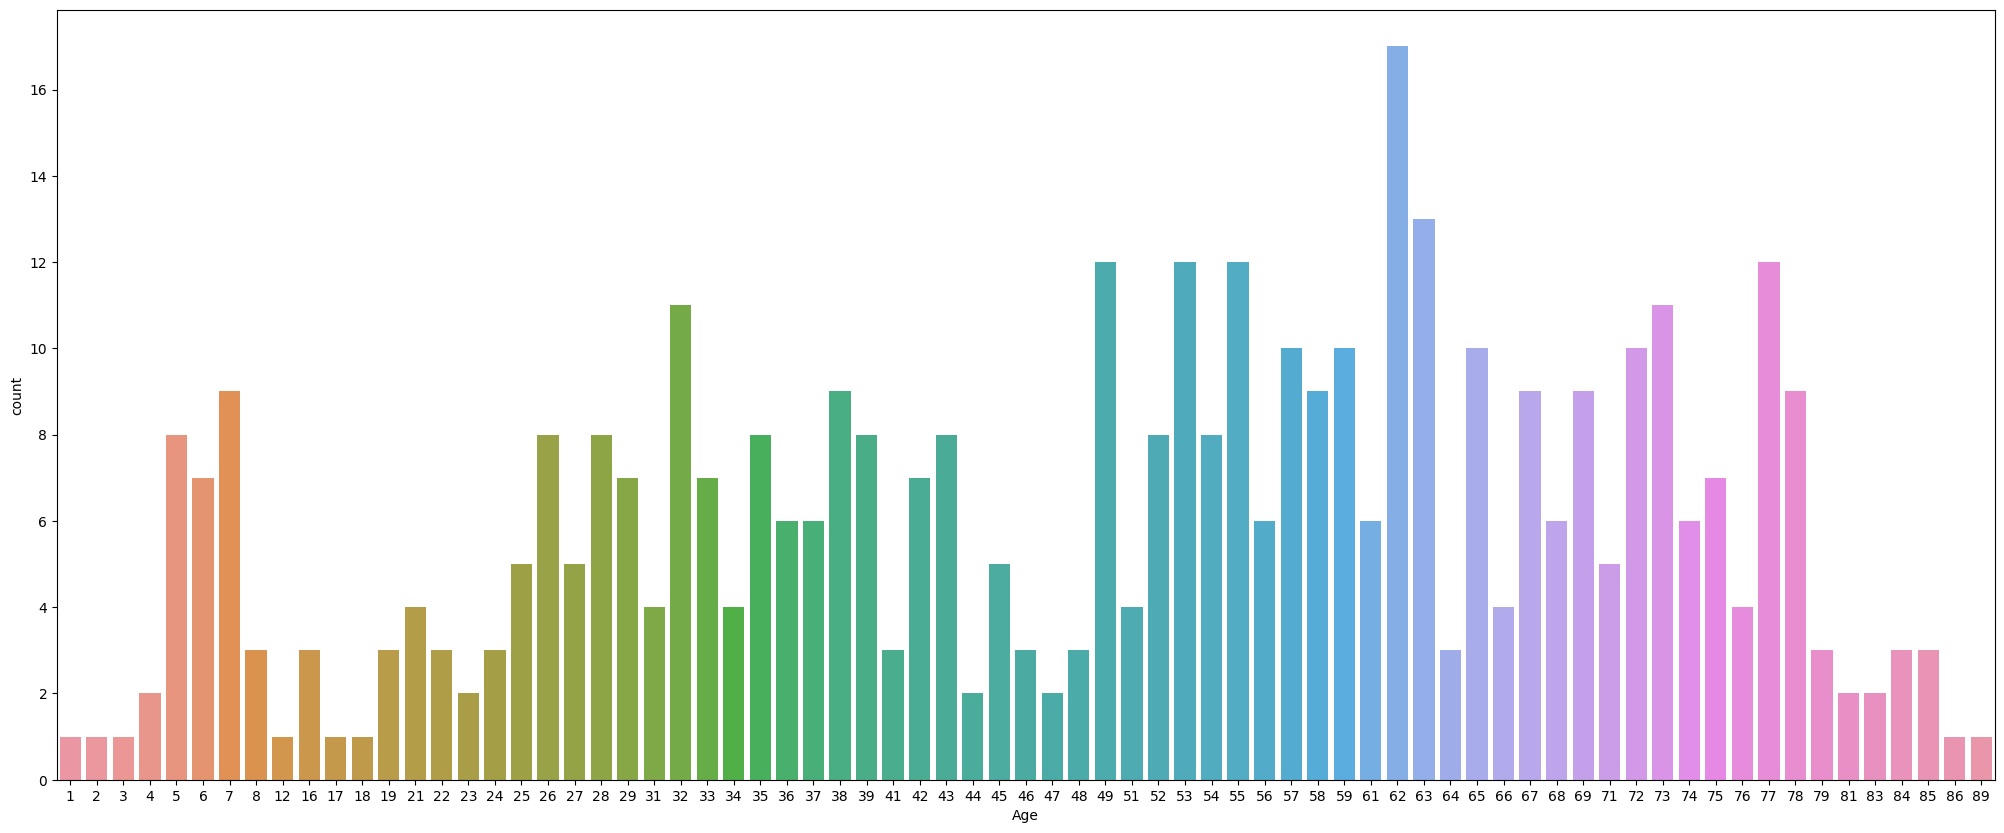

In [61]:
plt.figure(figsize=(25,10))
sns.countplot(x='Age',data=df)

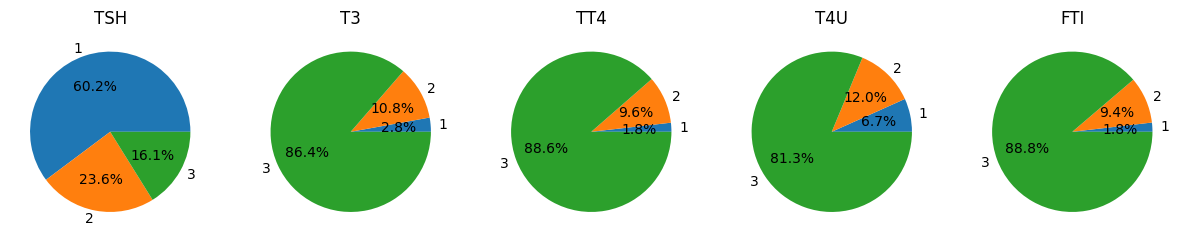

In [62]:
fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(1, 5)
fig.set_size_inches(15, 10)
ax1.pie(df.groupby('Class')['TSH'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax1.set_title('TSH')
ax2.pie(df.groupby('Class')['T3'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax2.set_title('T3')
ax3.pie(df.groupby('Class')['TT4'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax3.set_title('TT4')
ax4.pie(df.groupby('Class')['T4U'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax4.set_title('T4U')
ax5.pie(df.groupby('Class')['FTI'].sum(),autopct='%.1f%%',labels=[1,2,3])
ax5.set_title('FTI')
plt.show()

# training And testing model

#### here target column is class
- All other remaining column are in training

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('Class',axis='columns'),df.Class,test_size=0.2,random_state=0)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier(n_estimators=200)

In [67]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=200)

In [68]:
pred = rfc.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(confusion_matrix(Y_test,pred))

[[ 7  1  0]
 [ 0 11  0]
 [ 0  2 65]]


In [71]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.79      1.00      0.88        11
           3       1.00      0.97      0.98        67

    accuracy                           0.97        86
   macro avg       0.93      0.95      0.93        86
weighted avg       0.97      0.97      0.97        86



Text(0.5, 1.0, 'Original Value graph')

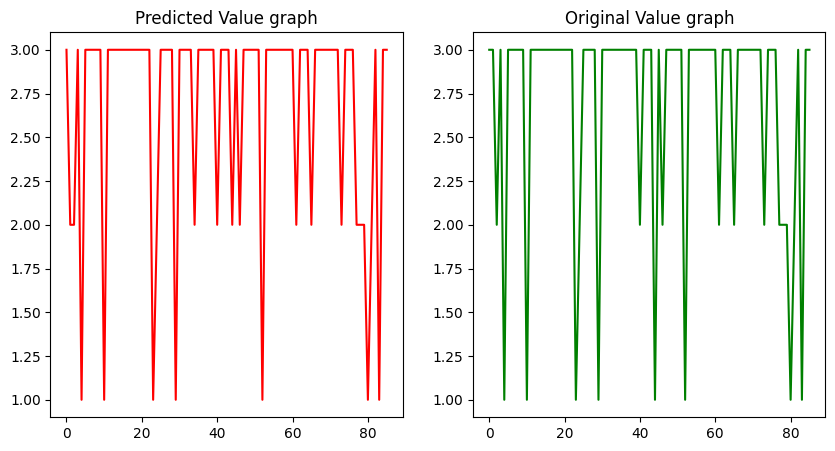

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)
ax1.plot(np.arange(len(pred)), pred, color='red', label='Predicted')
ax1.set_title('Predicted Value graph')

# add actual values to the plot, if you have them
ax2.plot(np.arange(len(Y_test)), Y_test, color='green', label='Actual')
ax2.set_title('Original Value graph')


In [6]:
df.columns.tolist()

['Age',
 'Sex',
 'On_thyroxine',
 'Query_on_thyroxine',
 'On_antithyroid_medicine',
 'Sick',
 'Pregnant',
 'Thyroid_surgery',
 'I131_treatment',
 'Query_hypothyroid',
 'Query_hyperthyroid',
 'Tumor',
 'Pysch',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',
 'Class']

In [7]:
X1 = df[['Age',
 'Sex',
 'On_thyroxine',
 'Query_on_thyroxine',
 'On_antithyroid_medicine',
 'Sick',
 'Pregnant',
 'Thyroid_surgery',
 'I131_treatment',
 'Query_hypothyroid',
 'Query_hyperthyroid',
 'Tumor',
 'Pysch',
 'TSH',
 'T3',
 'TT4',
 'T4U',
 'FTI',]].values
Y1 = df['Class'].values

In [9]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset here
X = np.array(X1)  # input features
y = np.array(Y1)  # output labels

# Define the number of partitions
n_splits = 5

# Shuffle the data randomly
np.random.seed(42)
indices = np.random.permutation(len(X))
X = X[indices]
y = y[indices]

# Create the KFold object to generate the partitions
kf = KFold(n_splits=n_splits)

# Train and test the random forest model on each partition
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Partition {i+1}:")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the random forest model on the training set
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Test the random forest model on the test set
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE: {mse}")


Partition 1:
MSE: 0.005861627906976744
Partition 2:
MSE: 0.02498372093023256
Partition 3:
MSE: 0.0005604651162790693
Partition 4:
MSE: 0.00413953488372093
Partition 5:
MSE: 0.00039058823529411707


In [1]:
# from sklearn.model_selection import KFold
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# import numpy as np

# # Load your dataset here
# X = np.array(X1)  # input features
# y = np.array(Y1)  # output labels

# # Define the number of partitions
# n_splits = 5

# # Shuffle the data randomly
# np.random.seed(42)
# indices = np.random.permutation(len(X))
# X = X[indices]
# y = y[indices]

# # Create the KFold object to generate the partitions
# kf = KFold(n_splits=n_splits)

# # Train and test the model on different partitions
# for i, (train_index, test_index) in enumerate(kf.split(X)):
#     print(f"Partition {i+1}:")
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

#     # Train the machine learning model on the training set
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Test the machine learning model on the remaining partitions
#     for j, (train_index2, test_index2) in enumerate(kf.split(X)):
#         if j != i:
#             X_train2, X_test2 = X[train_index2], X[test_index2]
#             y_train2, y_test2 = y[train_index2], y[test_index2]
#             y_pred = model.predict(X_test2)
#             mse = mean_squared_error(y_test2, y_pred)
#             print(f"Partition {j+1} MSE: {mse}")
